# Time Series Analysis For Southern District

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 

data_csv = pd.read_csv('03To18.csv')
data_csv.head()

IncidntNum         Category                                   Descript  \
0   150060275     NON-CRIMINAL                              LOST PROPERTY   
1   150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2   150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3   150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4   150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   

  DayOfWeek        Date   Time  PdDistrict Resolution  \
0    Monday  01/19/2015  14:00     MISSION       NONE   
1    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
2    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
3    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
4   Tuesday  01/27/2015  19:00    NORTHERN       NONE   

                       Address           X          Y  \
0        18TH ST / VALENCIA ST -122.421582  37.761701   
1  300 Block of LEAVENWORTH ST -122.414406  37.784191   
2  300 Block of LEAVENWORTH ST -122.414406  37.784191   
3  300 Block of LEAVENWORTH ST -122.414406  37.784191   
4       LOMBARD ST / LAGUNA ST -122.431119  37.800469   

                                Location            PdId  
0   (37.7617007179518, -122.42158168137)  15006027571000  
1  (37.7841907151119, -122.414406029855)  15009821003074  
2  (37.7841907151119, -122.414406029855)  15009821004014  
3  (37.7841907151119, -122.414406029855)  15009821015200  
4  (37.8004687042875, -122.431118543788)  15009822628160

In [10]:
data_csv_Southern = data_csv[data_csv['PdDistrict']=='SOUTHERN']
# data_csv_Southern_month = data_csv_Southern[data_csv_Southern['Date'][len(data_csv_Southern['Date'])-2:len(data_csv_Southern['Date'])] == "01"]

data_csv_Date = sorted(pd.to_datetime(data_csv_Southern.Date.value_counts().index))
data_csv_DateCount = data_csv_Southern.Date.value_counts().values[np.argsort(pd.to_datetime(data_csv_Southern.Date.value_counts().index))]
Southern_day_count = pd.DataFrame(data = data_csv_DateCount, index =data_csv_Date, columns=['num'])
Southern_month_count = Southern_day_count.resample('MS').sum()[:-1]
Southern_month_count.head()

num
2003-01-01  2116
2003-02-01  2071
2003-03-01  2321
2003-04-01  2312
2003-05-01  2215

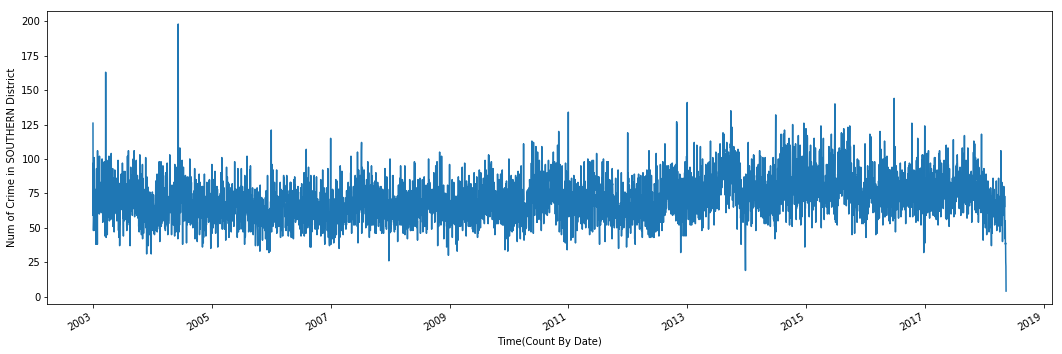

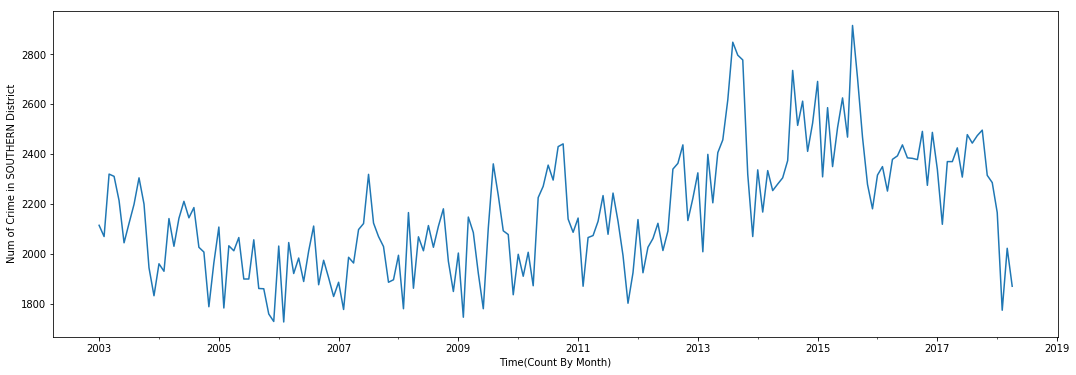

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb

Southern_fig1 = plt.figure(figsize=(18,6))
Southern_day_count['num'].plot()
plt.xlabel('Time(Count By Date)')
plt.ylabel('Num of Crime in SOUTHERN District')
plt.show()

Southern_fig2 = plt.figure(figsize=(18,6))
Southern_month_count['num'].plot()
plt.xlabel('Time(Count By Month)')
plt.ylabel('Num of Crime in SOUTHERN District')
plt.show()

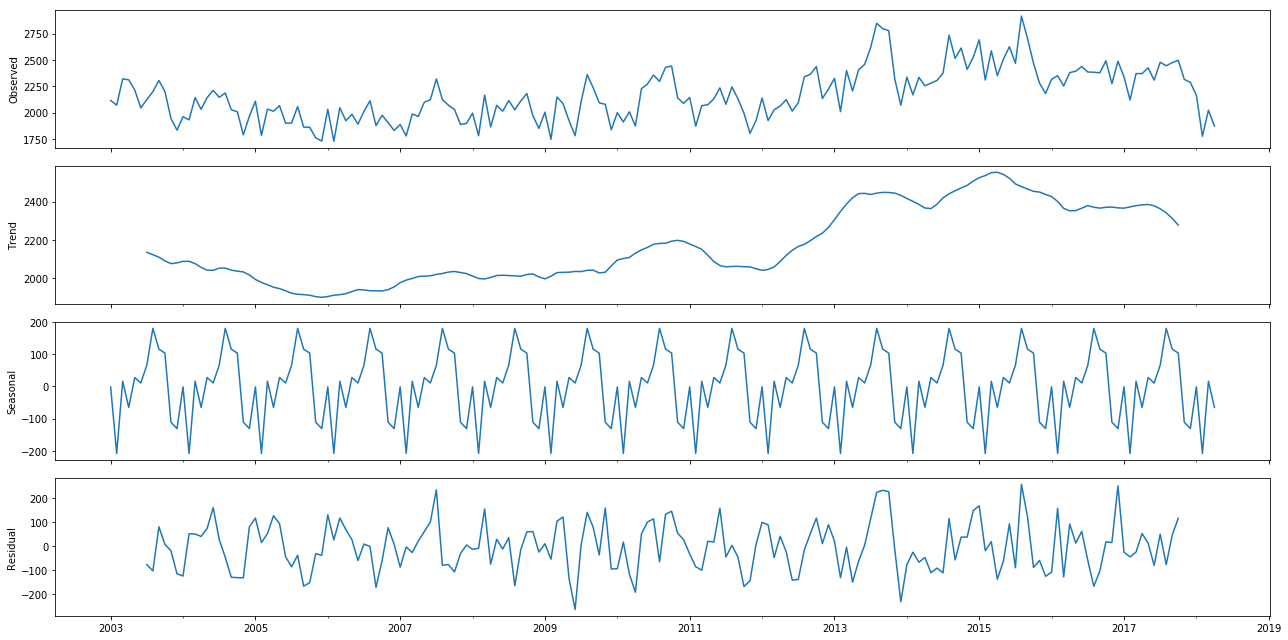

In [4]:
import statsmodels.api as sm

plt.rcParams['figure.figsize']=18,9
deco = sm.tsa.seasonal_decompose(Southern_month_count, model='additive')
fig = deco.plot()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4158      0.124      3.352      0.001       0.173       0.659
ma.L1         -0.7913      0.086     -9.170      0.000      -0.960      -0.622
ar.S.L12      -0.0693      0.085     -0.814      0.416      -0.236       0.098
ma.S.L12      -0.8663      0.067    -12.850      0.000      -0.998      -0.734
sigma2      1.497e+04   1965.277      7.618      0.000    1.11e+04    1.88e+04


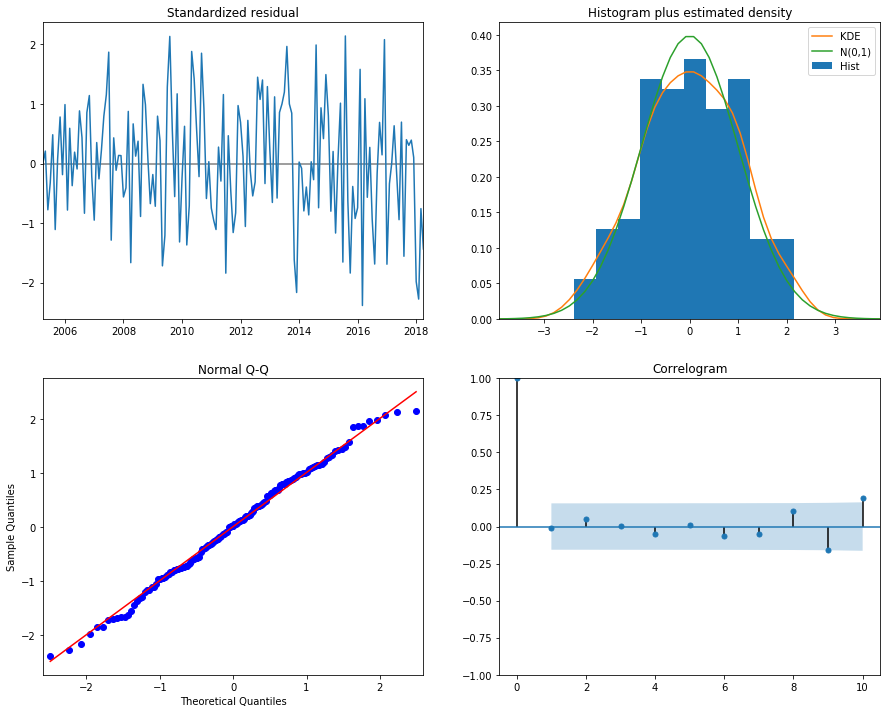

In [5]:
mod = sm.tsa.statespace.SARIMAX(Southern_month_count,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)#
TSresults = mod.fit()
print(TSresults.summary().tables[1])
TSresults.plot_diagnostics(figsize=(15, 12))
plt.show()

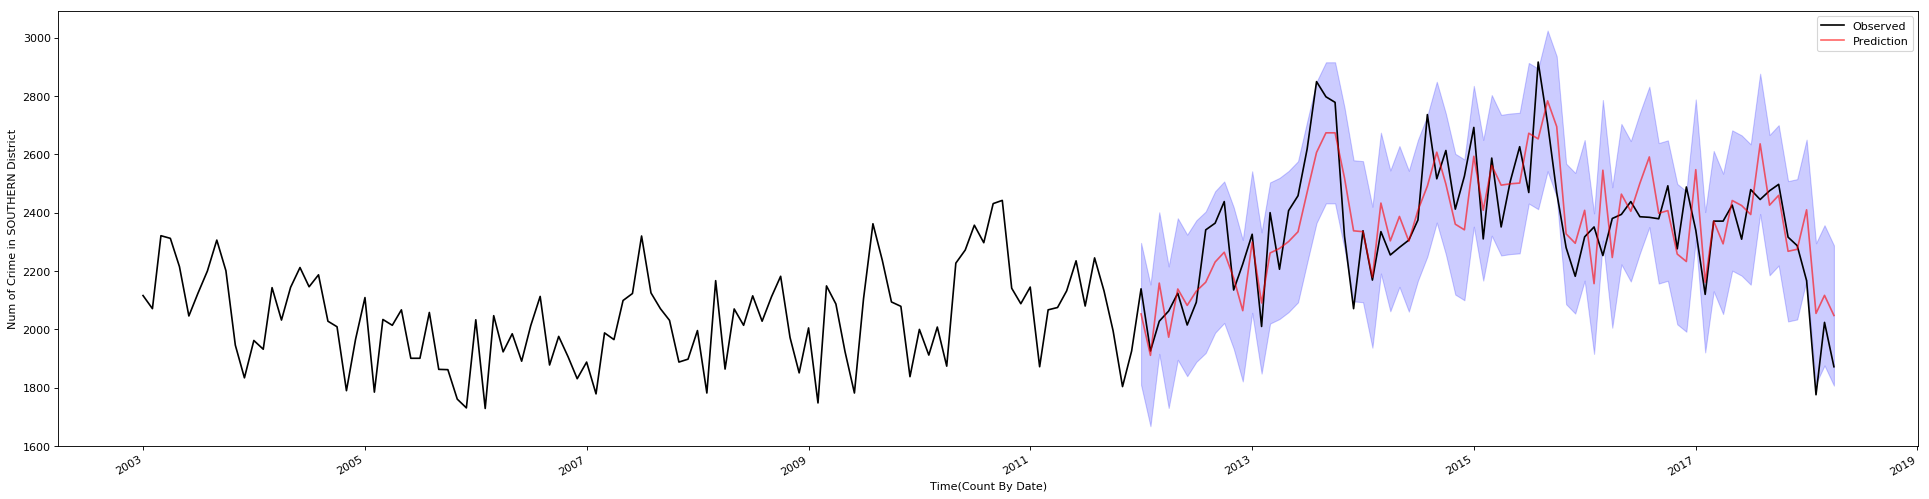

In [7]:
pred = TSresults.get_prediction(start=pd.to_datetime('2012-01-01'), end = pd.to_datetime('2018-04-01'),dynamic=False)
pred_ci = pred.conf_int()

plt.figure(figsize=(30,8), dpi=80)
ax = plt.subplot(111)
ax.plot(Southern_month_count['2003':],label='Observed', color = 'k')
pred.predicted_mean.plot(ax=ax, label='Prediction', color ='r', alpha=.6)

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='b', alpha=.2)

ax.set_xlabel('Time(Count By Date)')
ax.set_ylabel('Num of Crime in SOUTHERN District')
plt.legend()

plt.show()


In [9]:
pred_ci.head()

lower num    upper num
2012-01-01  1809.672635  2296.402970
2012-02-01  1668.246990  2153.771573
2012-03-01  1916.044764  2401.232172
2012-04-01  1730.693156  2215.716311
2012-05-01  1895.943282  2380.885254

#### We can see that from 2012-01-01 to 2018-04-01, the Prediction trend is approximately accord to the Obseverd trend. And we can use the prediction trend to predict the crime situation in Southern District in the future.

# Spatial Analysis over years

In [674]:
data_new= data_csv[data_csv['Y']<50]
X = data_new['X']
Y = data_new['Y']
Year = data_new.Date.map(lambda x: x[-4:len(x)])
Location = {'X': X, 'Y':Y, 'Year':Year}
data_Location= pd.DataFrame(Location, columns = ['X', 'Y','Year'])
year_dict = {}
for i in range(2003,2019):
    year_dict[i]=data_Location[data_Location['Year']==str(i)]
year_dict   

{2003:                   X          Y  Year
 226250  -122.406691  37.785207  2003
 227944  -122.444713  37.771302  2003
 229994  -122.418481  37.775898  2003
 231296  -122.397783  37.732115  2003
 233794  -122.410846  37.792316  2003
 242225  -122.459423  37.765225  2003
 242859  -122.408954  37.783288  2003
 242864  -122.432788  37.737157  2003
 242869  -122.502601  37.735612  2003
 242887  -122.403941  37.784301  2003
 242895  -122.424148  37.739870  2003
 242896  -122.463687  37.743748  2003
 242902  -122.416230  37.763634  2003
 242933  -122.417531  37.783311  2003
 242936  -122.414523  37.780875  2003
 242971  -122.410905  37.788029  2003
 242986  -122.393975  37.719610  2003
 242990  -122.437674  37.783209  2003
 243000  -122.407749  37.793636  2003
 243009  -122.410792  37.783695  2003
 243018  -122.394439  37.736444  2003
 243051  -122.411350  37.710604  2003
 243068  -122.435977  37.723129  2003
 243071  -122.432282  37.772829  2003
 243081  -122.412515  37.780478  2003
 24310

In [688]:
year_iterable = year_dict.iteritems()

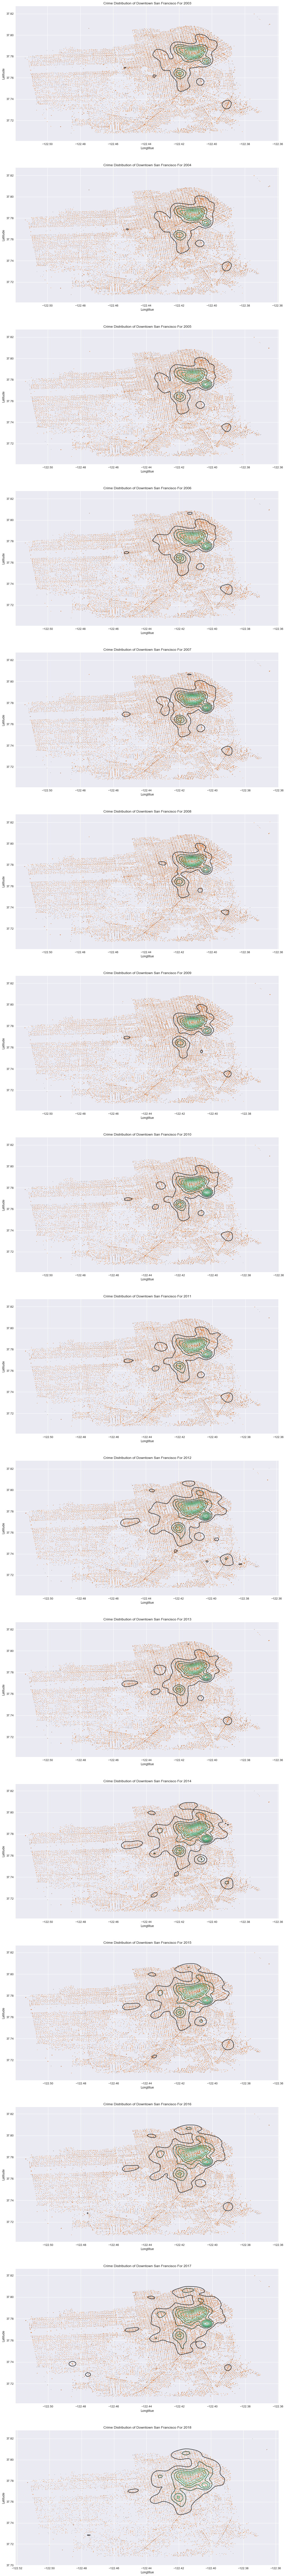

In [689]:
plt.rcParams['figure.figsize'] = 16, 160
plot_num = 1
for i in range(2003,2019):
    plt.subplot(16, 1, plot_num)
    plot_num += 1
    year_Loc = year_dict[i]
    plt.scatter(year_Loc['X'], year_Loc['Y'],color = '#D2691E', s = 0.6)
    sb.kdeplot(year_Loc['X'], year_Loc['Y'])
    plt.xlabel('Longtitue')
    plt.ylabel('Latitude')
    plt.title('Crime Distribution of Downtown San Francisco For '+str(i))
plt.show()

#### From the spatial analysis, we can see that generally,  the main criminal area expanded over years, which approximately contains area from 37.35 to 37.80(latitude) and from -122.43 to -122.40. In recent years(basically begins at  2012), main criminal area expands distinctly. Also, some new serious criminal area appear, like (30.72, -122.44) and (37.74, -122.48). Therefore, crime situation in Downtown SF deteriorates over years.

# Analysis of the relation between weather and robbery events in Central District

In [690]:
Central = data_csv[data_csv['PdDistrict'] == 'CENTRAL']

csv_date = Central['Date']
Date = sorted(pd.to_datetime(csv_date.value_counts().index))
# str(Date[0].month)
sorted_date = []
for item in Date:
    if item.year>=2016:break
    if len(str(item.month))==1:
        month = '0'+str(item.month)
    else: month =str(item.month) 
    if len(str(item.day))==1:
        day = '0'+str(item.day)
    else: day = str(item.day)
    res = month+"/"+day+"/"+str(item.year)
    sorted_date.append(res)

Central_date = Central.groupby(by = 'Date')
num = []
for i in sorted_date:
    if 'ROBBERY' in Central_date.get_group(i).Category.value_counts():
        num.append(int(Central_date.get_group(i).Category.value_counts().ROBBERY))
    else: num.append(0)              


In [691]:
{'Date':sorted_date, 'Num': num}
Central_robbery = pd.DataFrame(data = num, index = sorted_date, columns = ['Num'])
crime_dict = {sorted_date[i]: num[i] for i in range(len(sorted_date))}
crime_dict
Central_robbery.head()

Num
01/01/2003    1
01/02/2003    0
01/03/2003    2
01/04/2003    0
01/05/2003    2

In [692]:
import datetime

weather_data = pd.read_csv('03To15weather.csv')

In [693]:
def changeDate(i):
    month = i[3:5]
    day = i[0:2]
    comb = str(month+"/"+day+"/"+i[-4:len(i)])
    return comb
weather_data['PST']= weather_data['PST'].apply(changeDate)
weather_date = weather_data['PST']
crime_num = []
for date in weather_date:
    if date in crime_dict:crime_num.append(crime_dict[date])
    else: crime_num.append(0)
crime_num = pd.DataFrame(data = crime_num,  columns = ['Crime Num'])
weather_crime = weather_data.join(crime_num)
# weather_crime.columns.values.tolist()

In [694]:
def removeNonNumeric(input):
    if type(input) is str:
        try:
            return float(input)
        except:
            return 0.0
    else:
        return input
    
weather_crime['precipitation'] = weather_crime['PrecipitationIn'].apply(removeNonNumeric)
toDrop = [' Max Gust SpeedMPH', ' WindDirDegrees<br />','PrecipitationIn',' Min Humidity','Max Humidity','Max Dew PointF'
         ,'Min DewpointF', ' Max Sea Level PressureIn',' Mean Sea Level PressureIn',' Min Sea Level PressureIn',' Max Wind SpeedMPH',
         ' Max VisibilityMiles',' Min VisibilityMiles','Max TemperatureF','Min TemperatureF','MeanDew PointF',]
weather_crime = weather_crime.drop(toDrop,axis=1)
weather_crime[' Events'] = weather_crime[' Events'].fillna('Regular')
weather_crime = weather_crime.fillna(method = 'ffill')
weather_crime.head()

PST  Mean TemperatureF   Mean Humidity   Mean VisibilityMiles  \
0  01/01/2003                 48              90                      9   
1  01/02/2003                 50              88                      9   
2  01/03/2003                 50              84                     10   
3  01/04/2003                 52              91                      9   
4  01/05/2003                 52              97                      4   

    Mean Wind SpeedMPH   CloudCover   Events  Crime Num  precipitation  
0                    2            3  Regular          1           0.00  
1                    3            5  Regular          0           0.00  
2                    3            4  Regular          2           0.00  
3                    3            4      Fog          0           0.00  
4                    3            4      Fog          2           0.01

In [695]:
weather_crime.columns.values.tolist()

['PST',
 'Mean TemperatureF',
 ' Mean Humidity',
 ' Mean VisibilityMiles',
 ' Mean Wind SpeedMPH',
 ' CloudCover',
 ' Events',
 'Crime Num',
 'precipitation']

In [696]:
# corr = weather_crime[['PST',
#  'Mean TemperatureF',
#  ' Mean VisibilityMiles',
#  ' Mean Wind SpeedMPH',
#  ' CloudCover']
# ].corr()
# corr

In [697]:
y = np.where(weather_crime['Crime Num']>0,1,0)
y

array([1, 0, 1, ..., 1, 0, 1])

In [698]:
weather_crime_X = weather_crime.drop('Crime Num',axis=1)
weather_crime_X = pd.get_dummies(weather_crime_X,columns =[' Events'])
weather_crime_X['PST']=pd.to_datetime(weather_crime_X['PST'])
weather_crime_X['date']=pd.DatetimeIndex(weather_crime_X['PST']).date #添加date和time两个键和值
weather_crime_X['dayofweek']=pd.DatetimeIndex(weather_crime_X.date).dayofweek
weather_crime_X['dateDays'] = (weather_crime_X.date-weather_crime_X.date[0]).astype('timedelta64[D]')
weather_crime_X = weather_crime_X.drop(['PST', 'date'], axis=1)
X = weather_crime_X.as_matrix().astype(np.float)

# weather_crime_X.head()

In [699]:
weather_crime_X.head()

Mean TemperatureF   Mean Humidity   Mean VisibilityMiles  \
0                 48              90                      9   
1                 50              88                      9   
2                 50              84                     10   
3                 52              91                      9   
4                 52              97                      4   

    Mean Wind SpeedMPH   CloudCover  precipitation   Events_Fog  \
0                    2            3           0.00            0   
1                    3            5           0.00            0   
2                    3            4           0.00            0   
3                    3            4           0.00            1   
4                    3            4           0.01            1   

    Events_Fog-Rain   Events_Rain   Events_Rain-Thunderstorm   Events_Regular  \
0                 0             0                          0                1   
1                 0             0                          0                1   
2                 0             0                          0                1   
3                 0             0                          0                0   
4                 0             0                          0                0   

    Events_Thunderstorm  dayofweek  dateDays  
0                     0          2       0.0  
1                     0          3       1.0  
2                     0          4       2.0  
3                     0          5       3.0  
4                     0          6       4.0

In [700]:
# Scale the data/standard the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 4748 observations and 14 features
Unique target labels: [0 1]


In [707]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), weather_crime_X.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
dateDays: 0.2414
 Mean Humidity: 0.1762
Mean TemperatureF: 0.1511
 Mean Wind SpeedMPH: 0.1448
 CloudCover: 0.0992
dayofweek: 0.0845
 Mean VisibilityMiles: 0.0408
precipitation: 0.0362
 Events_Regular: 0.0086
 Events_Rain: 0.0073
 Events_Fog: 0.0061
 Events_Rain-Thunderstorm: 0.002
 Events_Fog-Rain: 0.0016
 Events_Thunderstorm: 0.0002


#### We can see that time is a main feature that correlates with crime situation, which is accord with the previous time series analysis. Besides, humidity and tempearture seems like correlated features. These may be due to the reason that cloudy day is more advantageous for criminal compared with sunny day

In [702]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    kf = KFold(len(y),n_folds=5,shuffle=True)#
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [705]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

SVM_CV_result = run_cv(X,y,SVC)
LR_CV_result = run_cv(X,y,LogisticRegression)

In [706]:
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))
print "SVM: " + str(accuracy(y, SVM_CV_result))

Logistic Regression (L2 is default): 0.5640269587194608
SVM: 0.5638163437236732
